
# Assignment: Linear Regression, Logistic Regression, and K-Means (From Scratch)

**Instructions**
- You are NOT allowed to use `scikit-learn` for model implementation, scaling.
- You may use it for implementation of clustering
- You may use: `numpy`, `matplotlib`, and standard Python libraries only.
- Every step (scaling, loss, gradients, optimization) must be implemented manually.
- Clearly comment your code and explain your reasoning in Markdown cells.


## Question 1: Linear Regression from Scratch (with Standardization and Regularization)

You are given a dataset `(X, y)`.

### Tasks
1. Implement **StandardScaler manually**:
   - Compute mean and standard deviation for each feature.
   - Standardize the features.
2. Implement **Linear Regression using Gradient Descent**.
3. Add **L2 Regularization (Ridge Regression)**.
4. Plot:
   - Loss vs iterations
   - True vs predicted values

Do NOT use `sklearn`.


In [ ]:

import numpy as np
import matplotlib.pyplot as plt


In [ ]:

# Implement StandardScaler manually ,  first read about it, how it works and then implement it
class StandardScalerManual:
    def fit(self, X):
        X = np.asarray(X, dtype=float)
        if X.ndim != 2:
            raise ValueError("Expected 2D input")
        # Compute statistics
        self.center = X.mean(axis=0)
        self.spread = np.sqrt(((X - self.center) ** 2).mean(axis=0))
        # Handle constant columns
        self.spread[self.spread < 1e-10] = 1.0
        self._fitted = True
        return self
    def transform(self, X):
        if not hasattr(self, "_fitted"):
            raise RuntimeError("Scaler not fitted")
        X = np.asarray(X, dtype=float)
        return (X - self.center) / self.spread
    def fit_transform(self, X):
        return self.fit(X).transform(X)
X_check = np.array([
    [1.0, 2.0],
    [3.0, 0.0],
    [5.0, 4.0]
])
sc = StandardScalerManual()
Xz = sc.fit_transform(X_check)
print("Mean:", sc.center)
print("Std:", sc.spread)
print("Scaled mean:", Xz.mean(axis=0))
print("Scaled std:", Xz.std(axis=0))

Mean: [3. 2.]
Std: [1.63299316 1.63299316]
Scaled mean: [0. 0.]
Scaled std: [1. 1.]


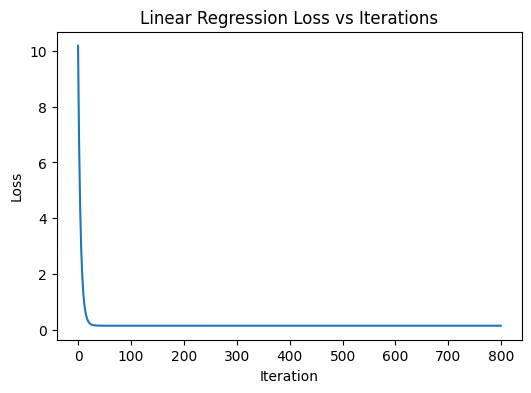

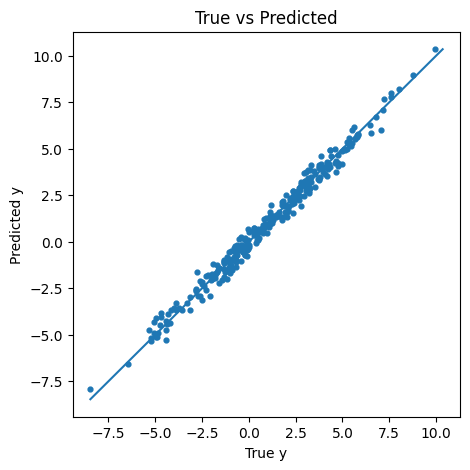

Final training MSE: 0.14446240160896348
Learned weights: [ 2.4846817  -1.63999903]
Learned bias: 0.9567377053725056


In [ ]:

# Implement Linear Regression from scratch, here you have to also construct the regulization term coefficient of which will be
# denoted by l2_lambda
# try to implement L1 regularization or atlease read about it and where it is used
class LinearRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2 = l2_lambda
    def fit(self, X, y):
        X = np.asarray(X, dtype=float)
        y = np.asarray(y, dtype=float)

        n_samples, n_features = X.shape
        self.W = np.zeros(n_features)
        self.b = 0.0
        self.losses = []
        for _ in range(self.epochs):
            # Predictions
            y_pred = X @ self.W + self.b
            # Errors
            residual = y_pred - y
            # Loss (MSE + L2)
            mse = np.mean(residual ** 2)
            reg = self.l2 * np.sum(self.W ** 2)
            self.losses.append(mse + reg)
            # Gradients
            grad_W = (2 / n_samples) * (X.T @ residual) + 2 * self.l2 * self.W
            grad_b = (2 / n_samples) * np.sum(residual)
            # Update
            self.W -= self.lr * grad_W
            self.b -= self.lr * grad_b
        return self

    def predict(self, X):
        X = np.asarray(X, dtype=float)
        return X @ self.W + self.b

np.random.seed(7)
# Generate synthetic regression data
N = 300
X_data = np.random.randn(N, 2)
true_coef = np.array([2.5, -1.7])
y_data = X_data @ true_coef + 0.8 + 0.4 * np.random.randn(N)
# Standardize inputs
scaler = StandardScalerManual()
X_scaled = scaler.fit_transform(X_data)
# Train linear regression model
reg = LinearRegressionManual(lr=0.05, epochs=800, l2_lambda=1e-3)
reg.fit(X_scaled, y_data)
# Predictions
y_hat = reg.predict(X_scaled)
# Loss vs iterations
plt.figure(figsize=(6, 4))
plt.plot(reg.losses)
plt.title("Linear Regression Loss vs Iterations")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()
# True vs predicted
plt.figure(figsize=(5, 5))
plt.scatter(y_data, y_hat, s=12)

low = min(y_data.min(), y_hat.min())
high = max(y_data.max(), y_hat.max())
plt.plot([low, high], [low, high])

plt.title("True vs Predicted")
plt.xlabel("True y")
plt.ylabel("Predicted y")
plt.show()
# Final metrics
mse_final = np.mean((y_hat - y_data) ** 2)
print("Final training MSE:", float(mse_final))
print("Learned weights:", reg.W)
print("Learned bias:", reg.b)


## Question 2: Logistic Regression from Scratch (with Standardization and Regularization)

You are given a binary classification dataset.

### Tasks
1. Reuse your **manual StandardScaler**.
2. Implement **Logistic Regression using Gradient Descent**.
3. Use:
   - Sigmoid function
   - Binary Cross Entropy loss
4. Add **L2 Regularization**.
5. Report:
   - Training loss curve
   - Final accuracy

Do NOT use `sklearn`.


In [ ]:

#Implement sigmoid function as told in the lectures
def sigmoid(x):
    x = np.asarray(x, dtype=float)
    x = np.clip(x, -50, 50)
    return 1.0 / (1.0 + np.exp(-x))

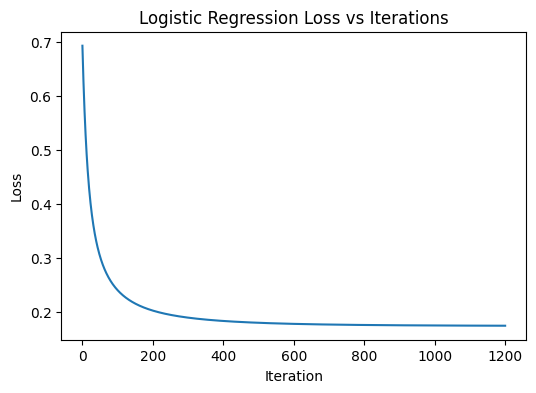

Final training accuracy: 0.936


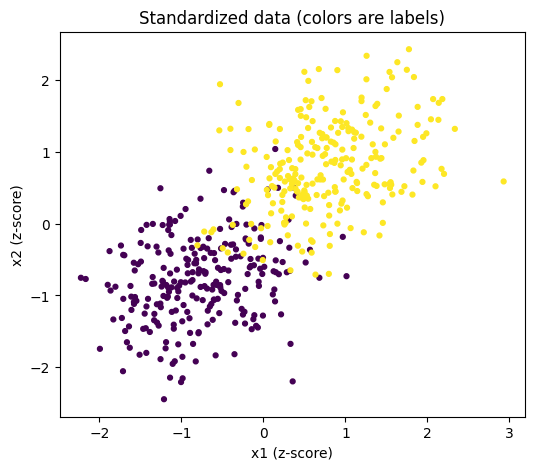

In [ ]:

#Implement Logistic Regression from scratch and here also add the regularizaation term
class LogisticRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2 = l2_lambda
    def _loss(self, y, p, w):
        # Binary cross-entropy + L2
        bce = -np.mean(y * np.log(p) + (1 - y) * np.log(1 - p))
        reg = self.l2 * np.sum(w ** 2)
        return bce + reg
    def fit(self, X, y):
        X = np.asarray(X, dtype=float)
        y = np.asarray(y, dtype=float)

        if X.ndim != 2:
            raise ValueError("X must be 2D")
        if not np.all((y == 0) | (y == 1)):
            raise ValueError("y must be binary")

        n, d = X.shape
        self.coef = np.zeros(d)
        self.bias = 0.0
        self.losses = []
        for _ in range(self.epochs):
            z = X @ self.coef + self.bias
            probs = sigmoid(z)
            probs = np.clip(probs, 1e-12, 1 - 1e-12)
            # Store loss
            self.losses.append(self._loss(y, probs, self.coef))
            # Gradients
            err = probs - y
            dw = (X.T @ err) / n + 2 * self.l2 * self.coef
            db = err.mean()
            # Update
            self.coef -= self.lr * dw
            self.bias -= self.lr * db
        return self
    def predict_proba(self, X):
        X = np.asarray(X, dtype=float)
        return sigmoid(X @ self.coef + self.bias)

    def predict(self, X):
        return (self.predict_proba(X) >= 0.5).astype(int)

np.random.seed(11)
# Generate synthetic binary classification data
n_a, n_b = 250, 250
mu_a = np.array([-1.2, -0.8])
mu_b = np.array([1.0, 1.3])
cov = np.array([[0.8, 0.2],
                [0.2, 0.7]])

Xa = np.random.multivariate_normal(mu_a, cov, size=n_a)
Xb = np.random.multivariate_normal(mu_b, cov, size=n_b)

X_all = np.vstack([Xa, Xb])
y_all = np.hstack([np.zeros(n_a), np.ones(n_b)])
# Standardize inputs
scaler = StandardScalerManual()
Xz = scaler.fit_transform(X_all)
# Train logistic regression model
model = LogisticRegressionManual(lr=0.08, epochs=1200, l2_lambda=1e-3)
model.fit(Xz, y_all)
# Loss vs iterations
plt.figure(figsize=(6, 4))
plt.plot(model.losses)
plt.title("Logistic Regression Loss vs Iterations")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()
# Training accuracy
preds = model.predict(Xz)
acc = (preds == y_all).mean()
print("Final training accuracy:", float(acc))
# Visualize standardized data
plt.figure(figsize=(6, 5))
plt.scatter(Xz[:, 0], Xz[:, 1], c=y_all, s=12)
plt.title("Standardized data (colors are labels)")
plt.xlabel("x1 (z-score)")
plt.ylabel("x2 (z-score)")
plt.show()


## Question 3: K-Means Clustering from Scratch (Matrix Clustering)

You are given a **random matrix** `M` of shape `(n, m)`.

### Tasks
Implement K-Means clustering **from scratch** such that:

1. Input:
   - A random matrix `M`
   - Number of clusters `k`
2. Output:
   - `assignment_table`: a matrix of same shape as `M`, where each element stores the **cluster label**
   - `cookbook`: a dictionary (hashmap) where:
     - Key = cluster index
     - Value = list of **positions (i, j)** belonging to that cluster
   - `centroids`: array storing centroid values

You must cluster **individual elements**, not rows.


Centroids: [ 0.21040777 -1.89083774  2.07560557  4.2474571 ]
Cluster sizes: {0: 845, 1: 435, 2: 810, 3: 310}


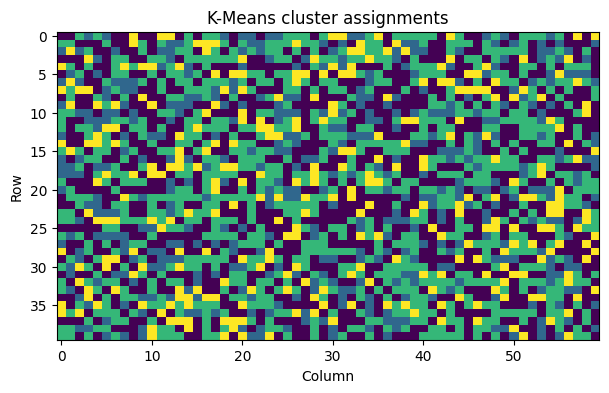

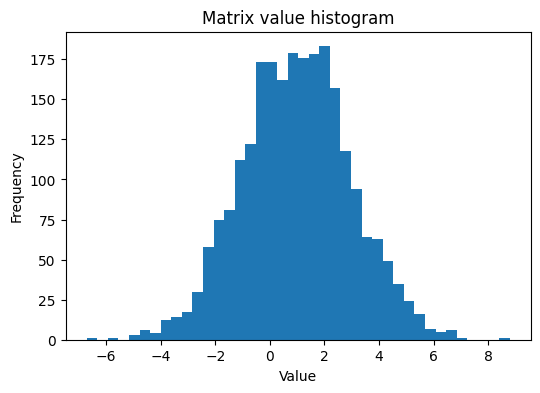

In [ ]:

# Implement K-Means for matrix elements
#CAN USE SK-LEARN FOR THIS TASK AS THIS TASK WILL HELP US DIRECTLY IN OUR PROJECT !
def kmeans_matrix(M, k, max_iters=100):
    '''
    Returns:
    assignment_table: same shape as M, contains cluster labels
    cookbook: dict -> cluster_id : list of (i, j) positions
    centroids: numpy array of centroid values
    '''
    M = np.asarray(M, dtype=float)
    if M.ndim != 2:
        raise ValueError("M must be 2D")
    rows, cols = M.shape
    values = M.flatten()
    total = values.size
    if k <= 0 or k > total:
        raise ValueError("Invalid k")
    rng = np.random.default_rng(123)
    # Random centroid initialization
    centroids = values[rng.choice(total, size=k, replace=False)]

    labels = np.full(total, -1, dtype=int)
    itr = 0
    while itr < max_iters:
        itr += 1
        # Assignment
        new_labels = np.zeros(total, dtype=int)
        for i in range(total):
            new_labels[i] = np.abs(values[i] - centroids).argmin()
        # Convergence
        if np.array_equal(new_labels, labels):
            break
        labels = new_labels
        # Update
        for c in range(k):
            pts = values[labels == c]
            if pts.size > 0:
                centroids[c] = pts.mean()
            else:
                centroids[c] = values[rng.integers(0, total)]

    # Build assignment table
    assignment_table = labels.reshape(rows, cols)

    # Build cookbook
    cookbook = {c: [] for c in range(k)}
    for idx, c in enumerate(labels):
        r = idx // cols
        c_idx = idx % cols
        cookbook[int(c)].append((int(r), int(c_idx)))

    return assignment_table, cookbook, centroids

np.random.seed(21)
# Generate random matrix
mat = np.random.randn(40, 60) * 2.0 + 1.0
k_val = 4
# Run K-Means clustering
assign, cook, centers = kmeans_matrix(mat, k_val, max_iters=80)
# Display centroids and cluster sizes
print("Centroids:", centers)
print("Cluster sizes:", {c: len(cook[c]) for c in cook})
# Visualize cluster assignments
plt.figure(figsize=(7, 4))
plt.imshow(assign, aspect="auto")
plt.title("K-Means cluster assignments")
plt.xlabel("Column")
plt.ylabel("Row")
plt.show()
# Histogram of matrix values
plt.figure(figsize=(6, 4))
plt.hist(mat.flatten(), bins=40)
plt.title("Matrix value histogram")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()



## Submission Guidelines
- Submit the completed `.ipynb` file.
- Clearly label all plots and outputs.
- Code readability and correctness matter.
- Partial credit will be given for logically correct implementations.

**Bonus**
- Compare convergence with and without standardization.
- Try different values of regularization strength.
